In [1]:
%matplotlib ipympl
from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from onix.data_tools import get_experiment_data
from onix.analysis.fitter import Fitter
from onix.analysis.helper import group_and_average_data
from tqdm import tqdm

In [89]:

# data_numbers = range(516432, 517067) #initial
# data_numbers = range(517068, 517209) # 45 deg half wave plate
# data_numbers = range(517210, 517386) # 90 deg half wave plate
# data_numbers = range(517387, 518194) # 90 deg half wave plate realigned
data_numbers = range(518255, 519042) # no HWP realigned
transmissions = []
optical_freqs = []
for data_number in data_numbers:
    data, headers = get_experiment_data(data_number)
    detunings_MHz = headers["detunings"].to("MHz").magnitude
    transmissions_avg = group_and_average_data(data["transmissions_avg"], headers["params"]["detect"]["cycles"])
    monitors_avg = group_and_average_data(data["monitors_avg"], headers["params"]["detect"]["cycles"])
    transmissions.append(monitors_avg["antihole"][0])
    optical_freqs.append(headers["params"]["wavemeter"]["freq"])

optical_freqs = np.array(optical_freqs) - 516847.603

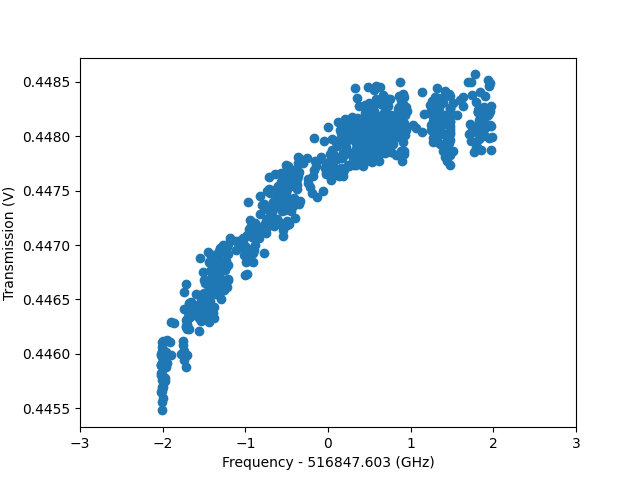

In [90]:
fig, ax = plt.subplots()
ax.scatter(optical_freqs, transmissions)
ax.set_xlabel("Frequency - 516847.603 (GHz)")
ax.set_ylabel("Transmission (V)")
ax.set_xlim([-3, 3])
plt.show()